# STAT207 Final Project - Predicting Personal Loan Decision


Brady Brooks Conan Zhang Richard Taing

In [2]:
#Imports!
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import statsmodels.formula.api as smf
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix
import warnings

## 1. Introduction

#### Research Introduction
In this report, let's take a look at banking information sourced from the Thera Bank to understand customer behavior when accepting personal loans. Personal loans are sums of money granted by financial institutions requiring a set repayment period and monthly payments until debt has been repaid. Personal loans act as better alternatives for borrowing money than typical financial options such as credit cards [1]. Thus, the research goal of this project is to build a predictive model that will effectively predict whether a customer accepted personal loans given known financial information for new banking datasets. Additionally with our best model, we can explore the nature of the relationships between all our financial variables to yield reliable interpretative insights in our analysis. With all this information, we can finally observe, compare, and generate insights on all the financial data used to yield descriptive analytics. Listed below explains all of the financial variables in consideration:

-  Age: Customer's age in completed years
-  Experience: # of years of professional experience
-  Income: Annual income of the customer ($000)
-  Zip Code: Home Address ZIP code
-  Family: Family size of the customer
-  Credit Card Average (CCAvg): Average spending on credit cards per month ($000)
-  Education: Education Level: Undergraduate, Graduate, Advanced/Professional
-  Mortgage: Value of house mortgage if any ($000)
-  Personal Loan: Did this customer accept the personal loan offered in the last campaign?
-  Securities Account: Does the customer have a securities account with the bank?
-  CD Account: Does the customer have a certificate of deposit (CD) account with the bank?
-  Online: Does the customer use internet banking facilities?
-  Credit Card: Does the customer use a credit card issued by

#### Research Motivation
Personal loans can be used in versatile ways such as for debt consolidation, education payments, large purchases, personal investments, and more. By building the best predictive model to predict whether a customer accepts a personal loan, a person can observe how other unique financial backgrounds and situations help influence a decision in taking loans, and make their own financial decision in borrowing money [1]. Additionally, through the model's results, bankers can evaluate what type of customers tend to take personal loans and target that specific audience for their business. Financial advisors can also use the model's results to target consumers who are likely to accept personal loans and allocate more resources and effort into these customers. This can include offering information on the loan application process, loan terms, interest rates, and repayment options. Bankers and financial advisors would thus prefer a classifier that better classifies the positives because they need customers to make money, and by shifting their focus to only those customers who might need loans, they can step in and provide the next steps for the customer.

## 2. Dataset Discussion

#### Dataset Source
This dataset was taken and downloaded from Kaggle on December 2nd, 2023. (https://www.kaggle.com/datasets/krantiswalke/bank-personal-loan-modelling/data). [2]

In [3]:
pd.set_option('display.max_columns', None)
df = pd.read_csv('Bank_Personal_Loan_Modelling.csv')
df.columns = [c.replace(' ', '_') for c in df.columns]
df['Education'] = df['Education'].replace({1:'Undergrad', 2:'Graduate', 3:'Professional'})
df['Personal_Loan'] = df['Personal_Loan'].replace({1:'T', 0:'F'})
df['Securities_Account'] = df['Securities_Account'].replace({1:'T', 0:'F'})
df['CD_Account'] = df['CD_Account'].replace({1:'T', 0:'F'})
df['Online'] = df['Online'].replace({1:'T', 0:'F'})
df['CreditCard'] = df['CreditCard'].replace({1:'T', 0:'F'})
df = df.drop(["ID"], axis=1)
df.head()

,Age,Experience,Income,ZIP_Code,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,25,1,49,91107,4,1.6,Undergrad,0,F,T,F,F,F
1,45,19,34,90089,3,1.5,Undergrad,0,F,T,F,F,F
2,39,15,11,94720,1,1.0,Undergrad,0,F,F,F,F,F
3,35,9,100,94112,1,2.7,Graduate,0,F,F,F,F,F
4,35,8,45,91330,4,1.0,Graduate,0,F,F,F,F,T


In [4]:
df.shape

(5000, 13)

#### Original Dataset Information
Each observation in the dataset represents a customer from the Thera Bank with a unique set of information (demographics, banking information, financial information, etc.). The entire dataset was generated as a case study from the Thera Bank from one of their previous campaigns to predict if customers took loans or not [2]. This dataset is mostly inclusive of all possible types of observations as it samples a pretty unique demographic set of people each with their own unique financial backgrounds and relationships with the bank. However, the dataset only takes customers from one of their previous campaigns, so any shifts in the market since then, stock changes in the bank, and any customers who don’t use Thera Banking are not included when building our model. The dataset also does not specify which year the campaign was from, possibly making this dataset outdated and biased.


Given these limitations, a banker trying to use this information should generalize the model's results more as a representation of potential financial trends rather than directly applying these results to their own banking institution. Bankers and financial advisors should thus be cautious directly interpreting the model and should explore other banking institution data to see if the trends/results for the Thera Bank holds for other banks.

#### Selected Variables
In conducting our research to find the best predictive model, personal loan will be our response variable (T indicating True, a customer did take a loan and F indicating False, a customer did not take a loan). We thus intend to use all our selected variables to build our model as we would also like to explore which variables have the most predictive power in predicting loan acceptance and which variables essentially don't matter.

## 3. Dataset Cleaning

#### Missing Value Detection and Cleaning
There are no explicit or implicit values within the dataset as all data types look correct. Thus we do not need to remove any rows in this instance.

In [5]:
df.dtypes

Age                     int64
Experience              int64
Income                  int64
ZIP_Code                int64
Family                  int64
CCAvg                 float64
Education              object
Mortgage                int64
Personal_Loan          object
Securities_Account     object
CD_Account             object
Online                 object
CreditCard             object
dtype: object

In [6]:
df.isna().sum()

Age                   0
Experience            0
Income                0
ZIP_Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal_Loan         0
Securities_Account    0
CD_Account            0
Online                0
CreditCard            0
dtype: int64

#### Sample Size Cleaning
All categorical variables have a sufficient sample size for each unique observation so there is no need to drop any levels. Also every numerical explanatory variable in the dataframe satisfies a sufficient sample size requirement.


In [7]:
education = df['Education'].value_counts()
education

Undergrad       2096
Professional    1501
Graduate        1403
Name: Education, dtype: int64

In [8]:
pl = df['Personal_Loan'].value_counts()
pl

F    4520
T     480
Name: Personal_Loan, dtype: int64

In [9]:
sa = df['Securities_Account'].value_counts()
sa

F    4478
T     522
Name: Securities_Account, dtype: int64

In [10]:
CDA = df['CD_Account'].value_counts()
CDA

F    4698
T     302
Name: CD_Account, dtype: int64

In [11]:
online = df['Online'].value_counts()
online

T    2984
F    2016
Name: Online, dtype: int64

In [12]:
credit = df['CreditCard'].value_counts()
credit

F    3530
T    1470
Name: CreditCard, dtype: int64

In [13]:
num_df = df[["Age", "Experience", "Income", "Family", "CCAvg", "Mortgage"]]
num_df.head(1)

,Age,Experience,Income,Family,CCAvg,Mortgage
0,25,1,49,4,1.6,0


#### Outlier Cleaning - Two Variable Outlier Inspection
Displaying the pairplot of the linear relationship between each numerical explanatory variable, there seems to not be any significant outliers in the data. Although mortgage has one observation (0$) unlike the majority of the data, there seems to be no issue with including this observation. Our model wants diverse financial information to create the best model that can predict loan decision for any type of person. Thus, including an extreme of the mortgage of 0$ where customers are likely not even paying the mortgage, we can generalize our best model's results better.


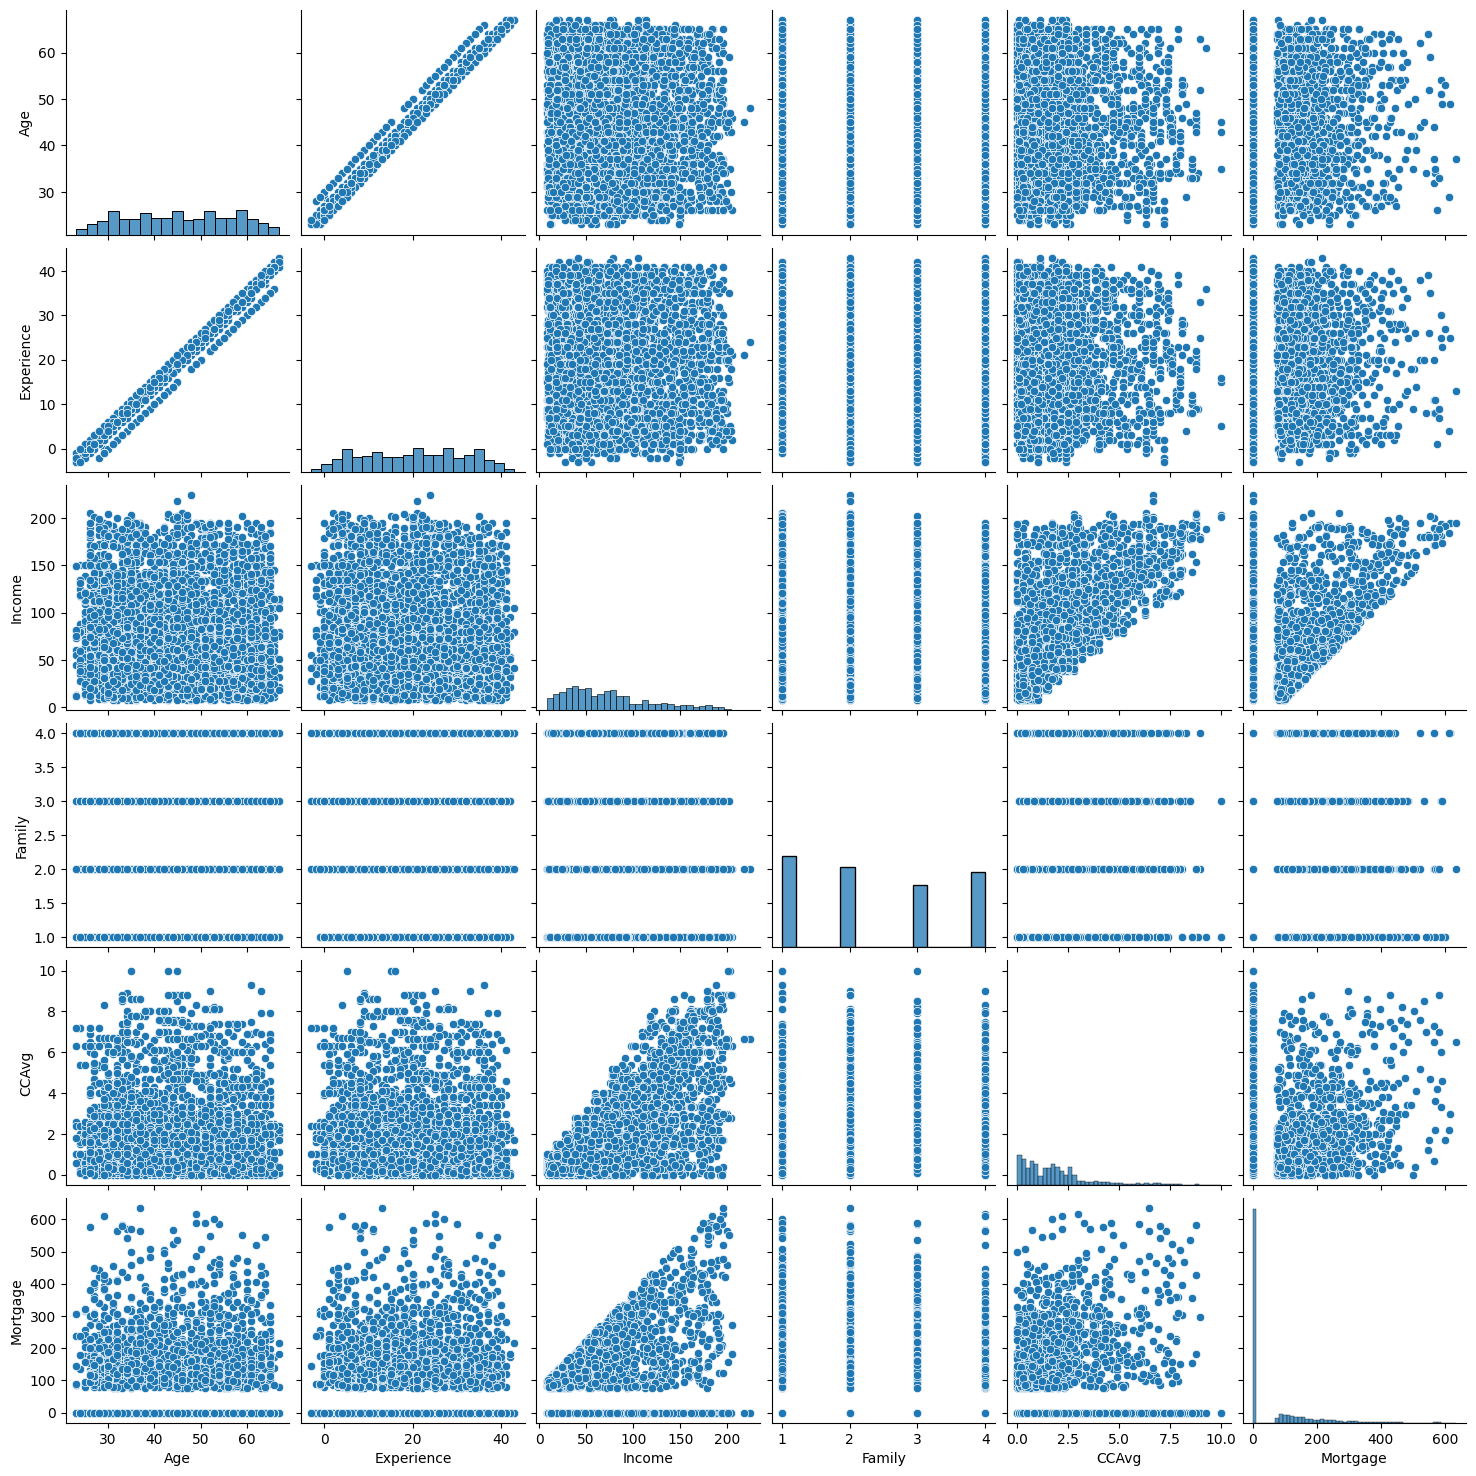

In [14]:
sns.pairplot(num_df)
plt.show()

#### Additional Cleaning
Because Zip Code represents a string similar to an ID #, it should not be included in building our model. In our sample size understanding, Zip Code also has multiple levels containing only one observation. Thus the variable is removed from our dataset.


In [15]:
zip = df['ZIP_Code'].value_counts()
zip

94720    169
94305    127
95616    116
90095     71
93106     57
        ... 
96145      1
94087      1
91024      1
9307       1
94598      1
Name: ZIP_Code, Length: 467, dtype: int64

In [16]:
df = df.drop(["ZIP_Code"], axis=1)

## 4. Preliminary Analysis

#### Relationships between the Response Variable and the Explanatory Variables
Visualizing the relationship between all explanatory variables and the response variable, age and experience appear to have almost no association with personal loan decision due to the high overlap in boxplots. In addition, the categorical variables: Online, Credit Card, and Securities Account also have low association with the response variable due to the relative frequency bars in the barplots being the same distribution. Thus, the explanatory variables with the STRONGEST relationship with the response variable are CD_Account, CC_Avg, Family, Income, while the explanatory variables with the weakest relationship with the response variable are CreditCard, Online, and Age.


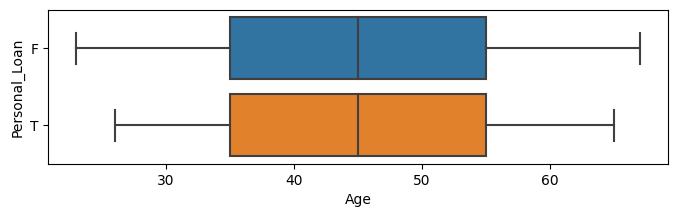

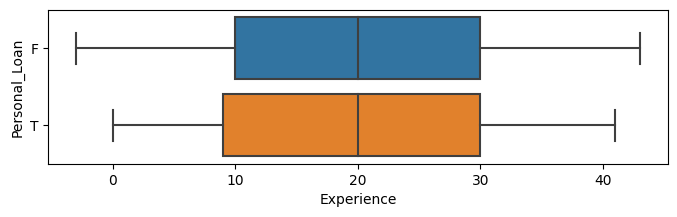

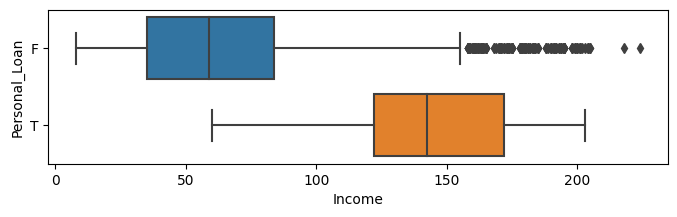

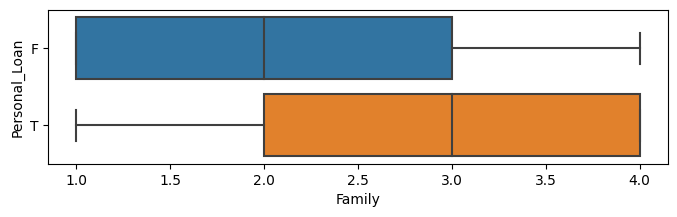

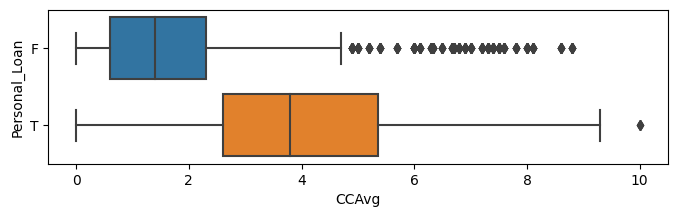

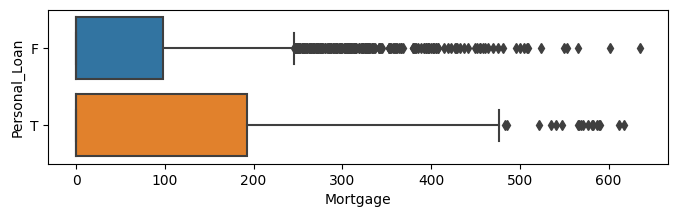

In [17]:
for col in num_df:
    plt.figure(figsize=(8,2))
    sns.boxplot(x=col, y='Personal_Loan', data=df)
    plt.show()

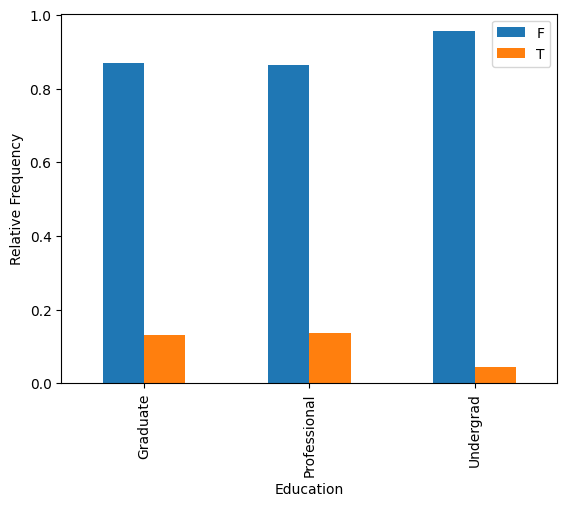

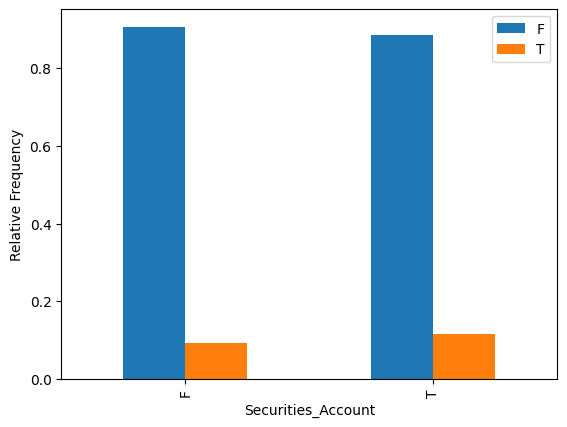

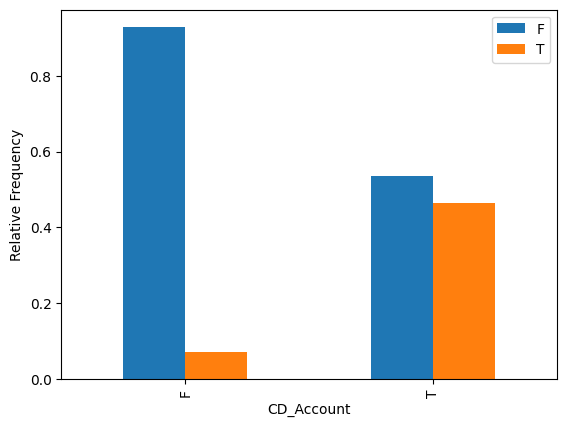

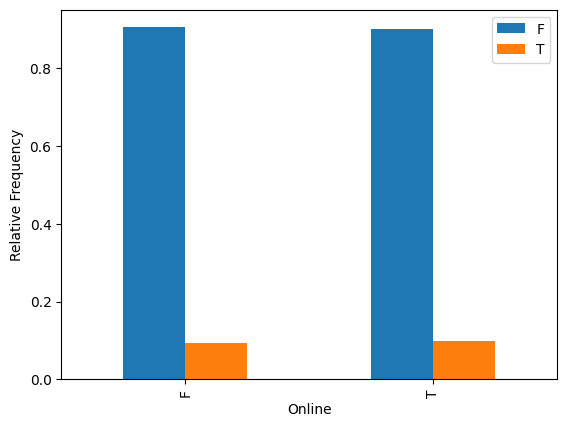

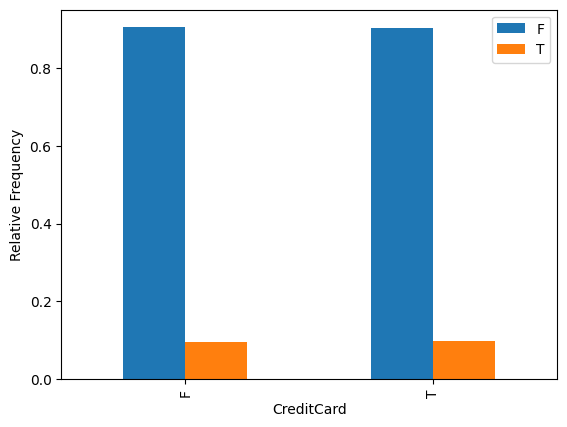

In [18]:
cat_df = df[["Education", "Securities_Account", "CD_Account", "Online", "CreditCard"]]
for cat in cat_df:
    temp = pd.crosstab(df[cat], df['Personal_Loan'], normalize='index')
    temp.plot.bar()
    plt.legend(loc='upper right')
    plt.ylabel('Relative Frequency')
    plt.show()

#### Relationships between Explanatory Variable Pairs
Age and Experience have a correlation of 0.994215 which is greater than 0.7. Thus, this strong collinear pair could overfit our predictive model.

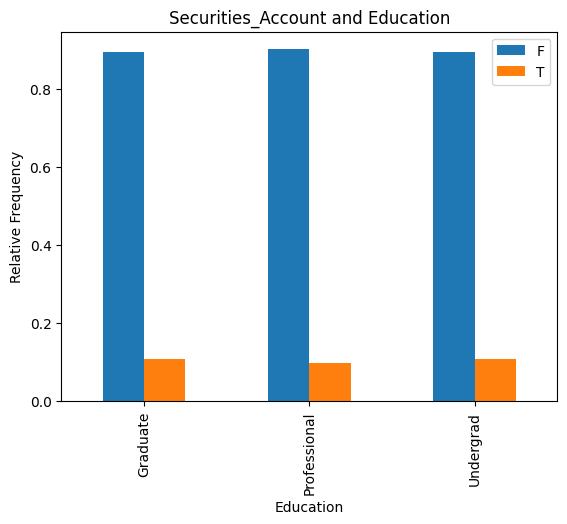

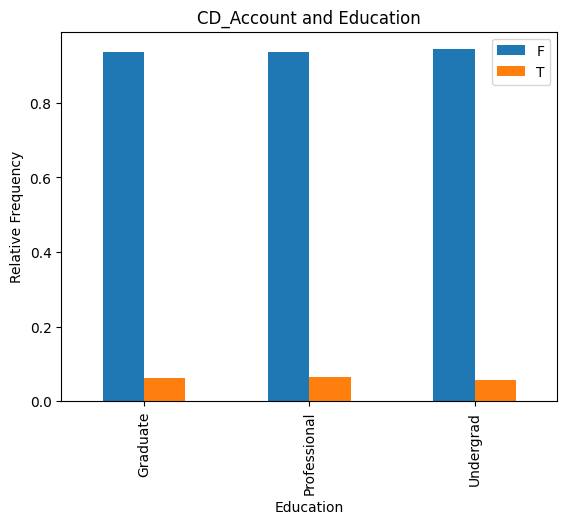

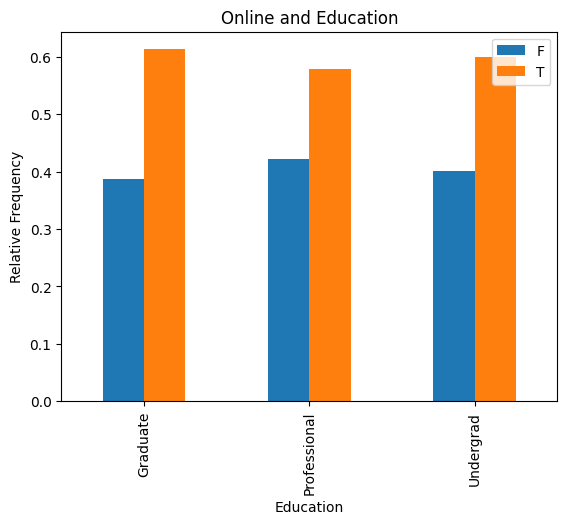

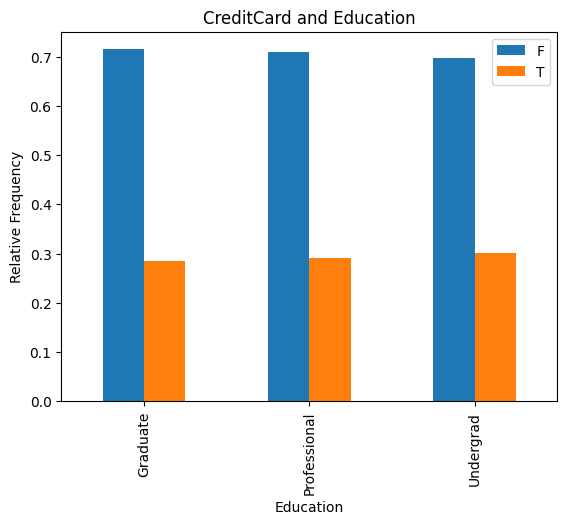

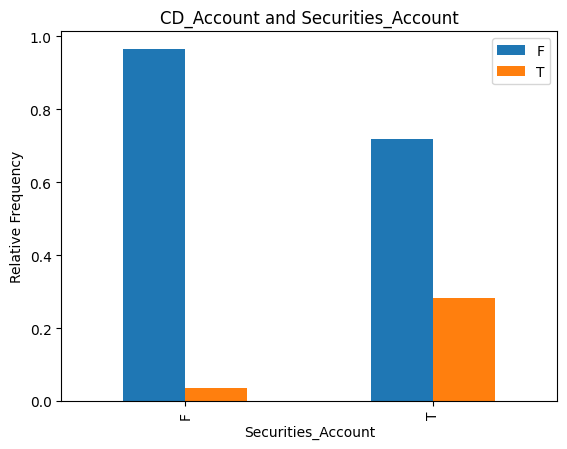

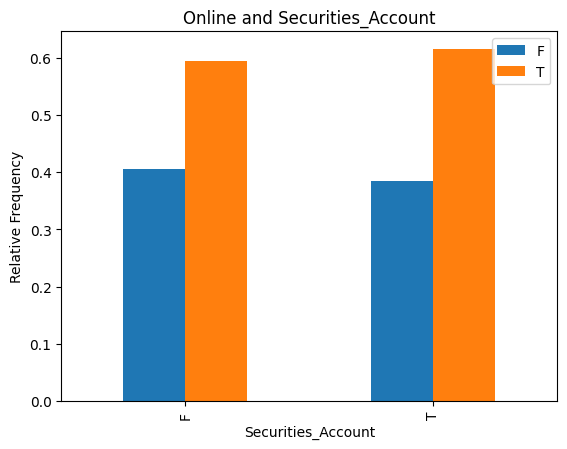

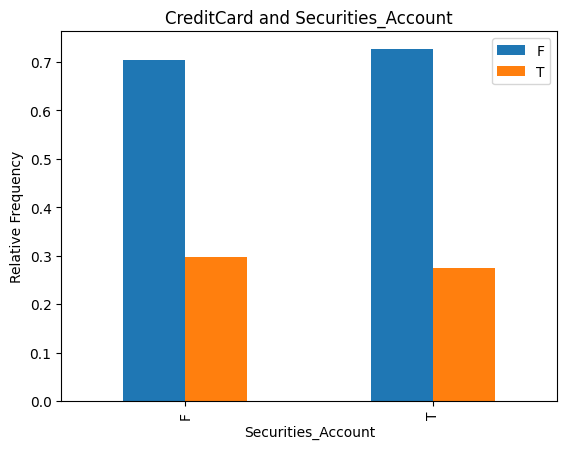

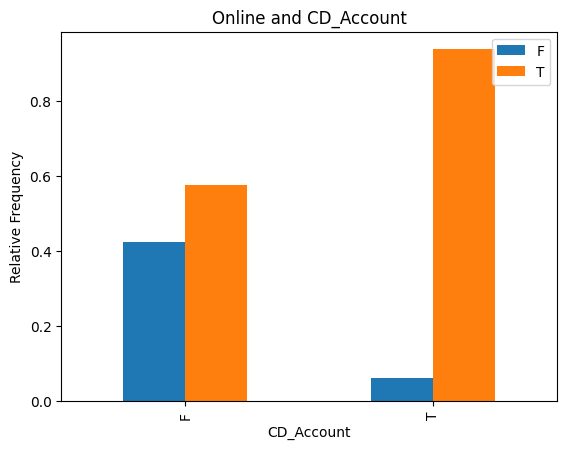

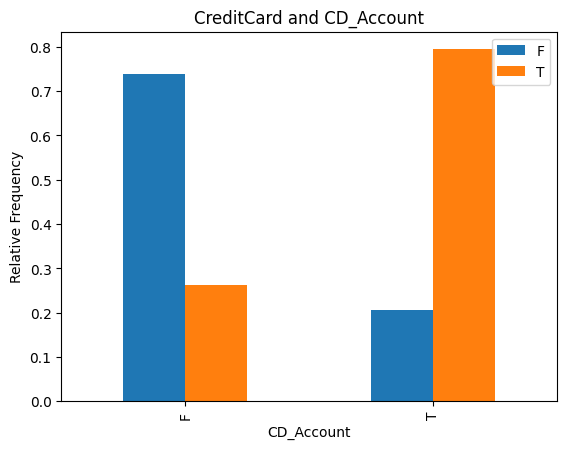

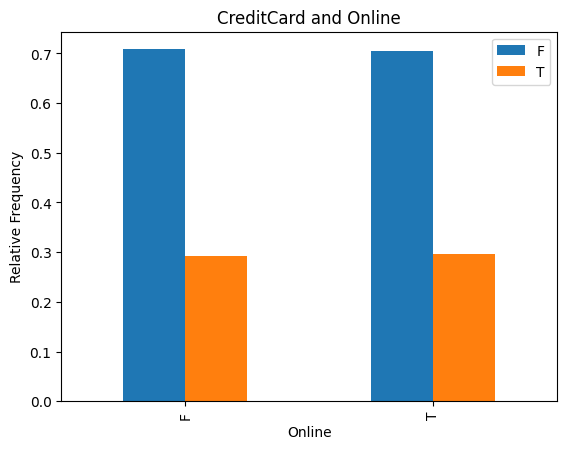

In [19]:
count = 0
for cat in cat_df:
    index = 0
    for cat2 in cat_df:
        if ((cat != cat2) & (index > count)):
            temp = pd.crosstab(df[cat], df[cat2], normalize='index')
            temp.plot.bar()
            plt.legend(loc='upper right')
            plt.ylabel('Relative Frequency')
            plt.title(cat2 + " and " + cat)
            plt.show()
        index = index + 1
    count = count + 1

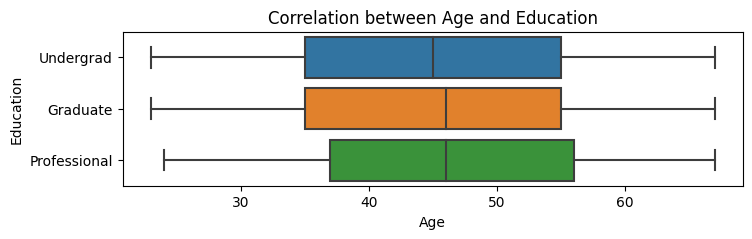

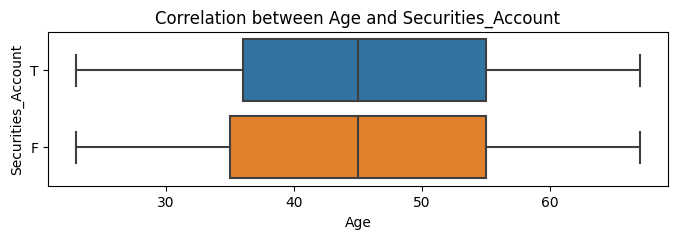

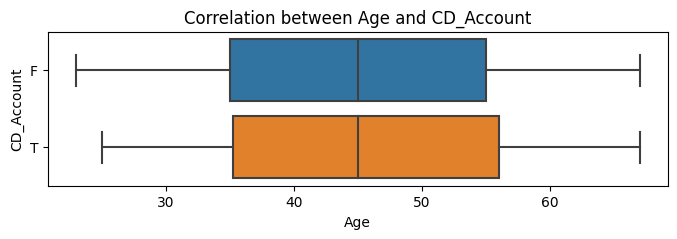

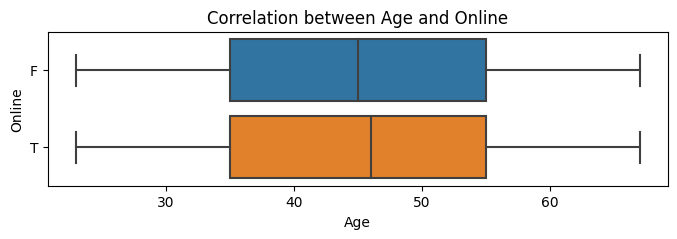

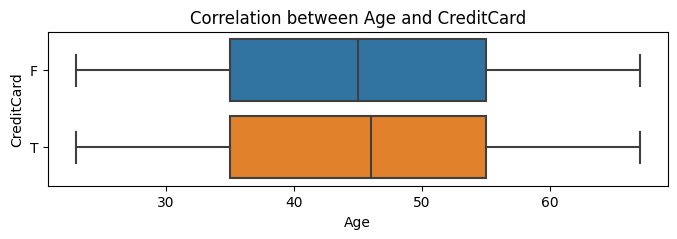

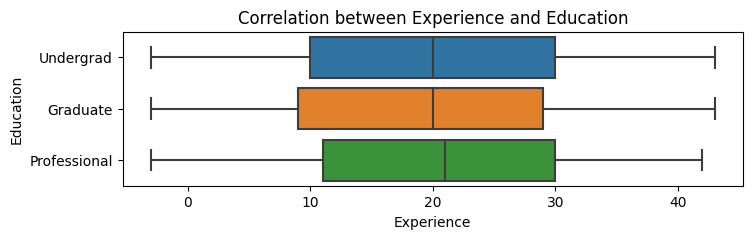

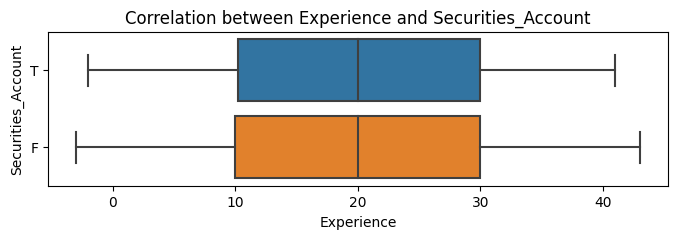

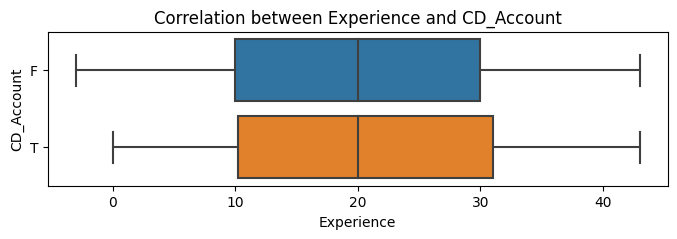

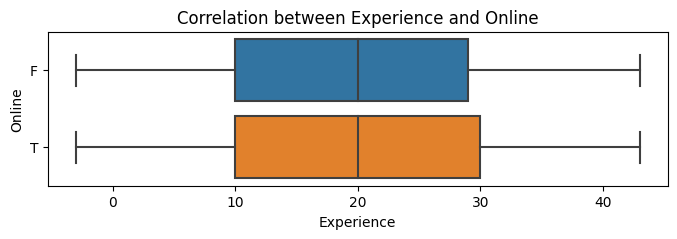

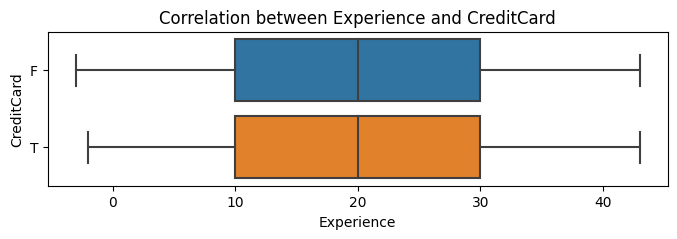

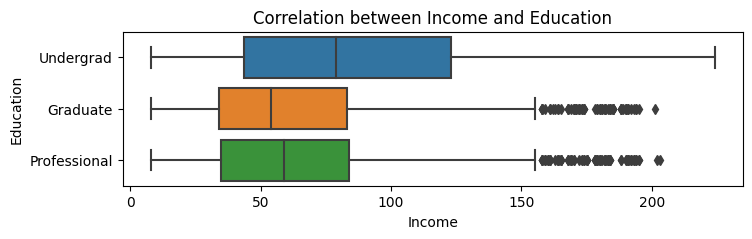

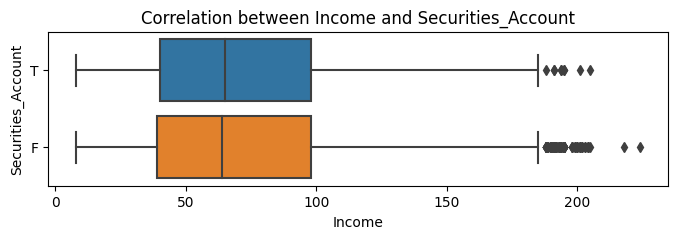

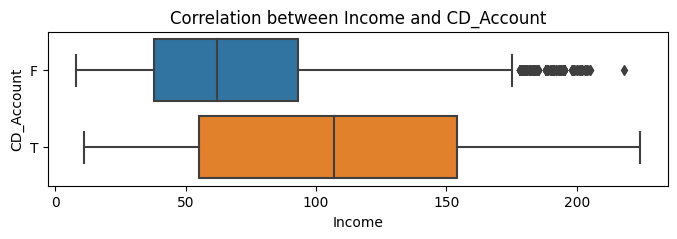

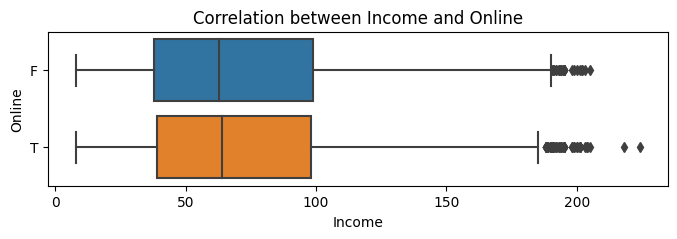

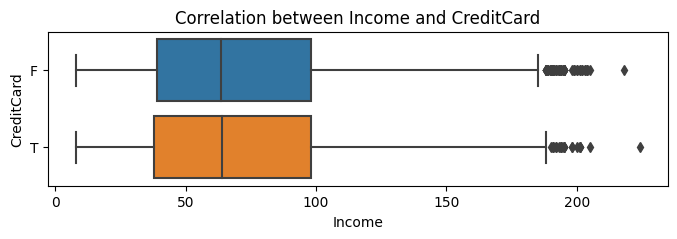

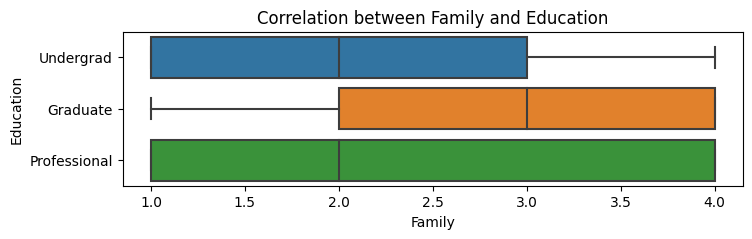

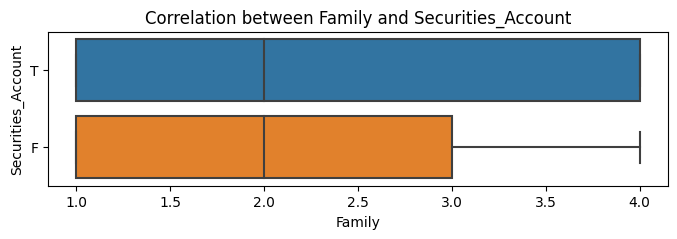

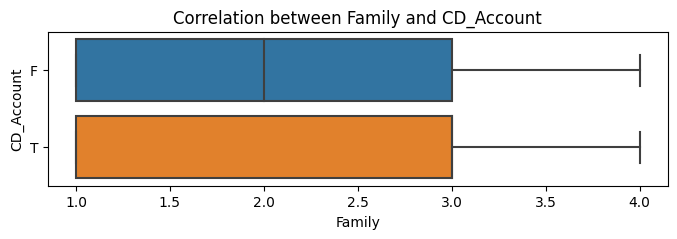

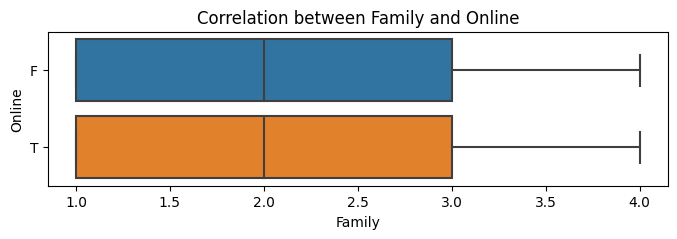

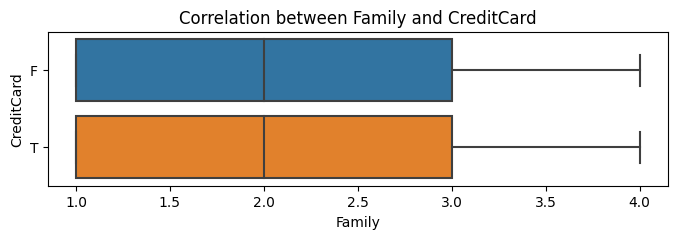

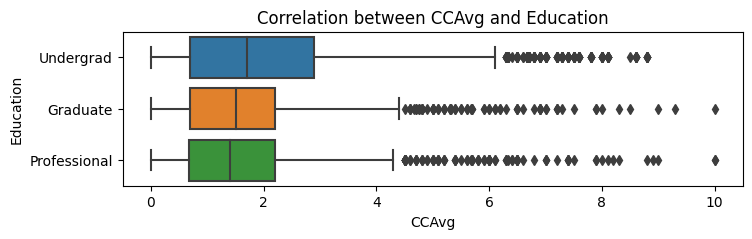

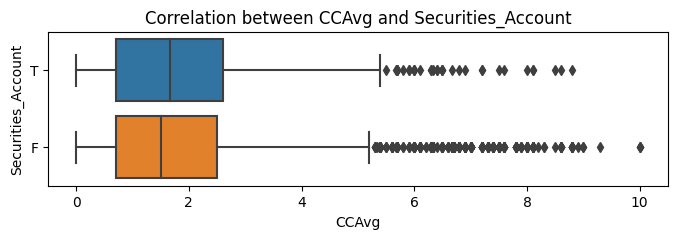

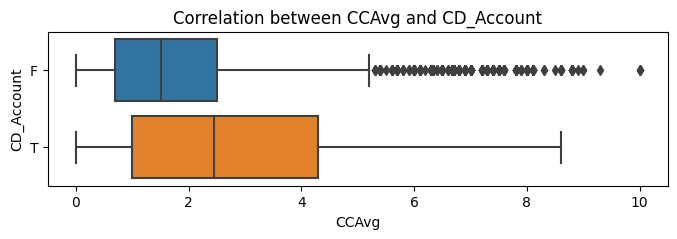

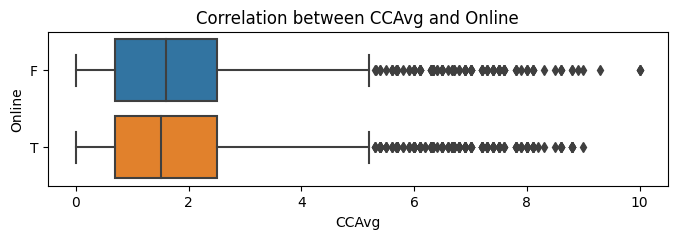

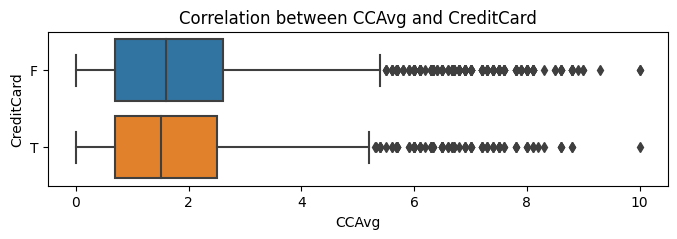

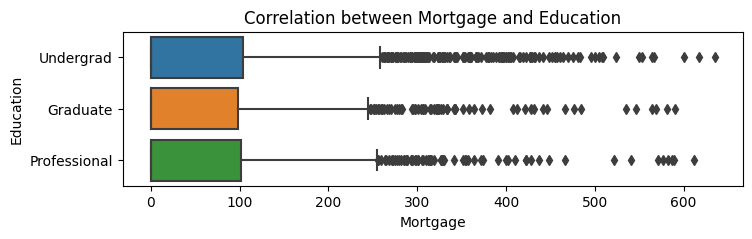

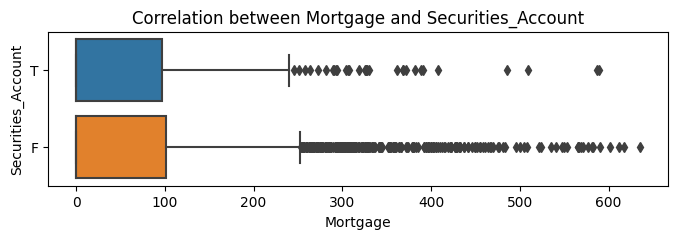

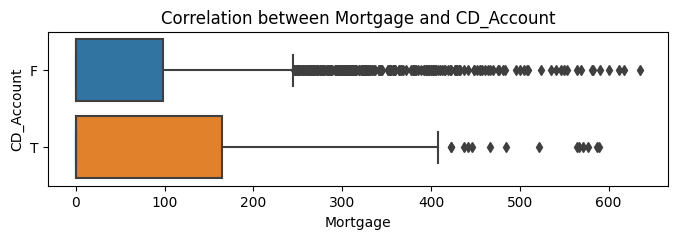

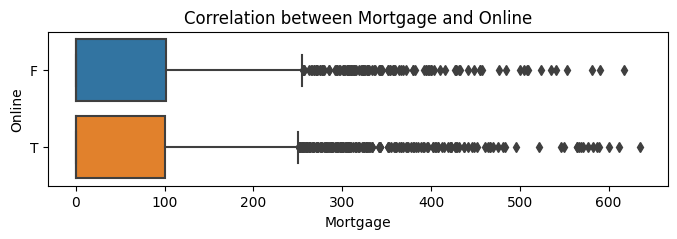

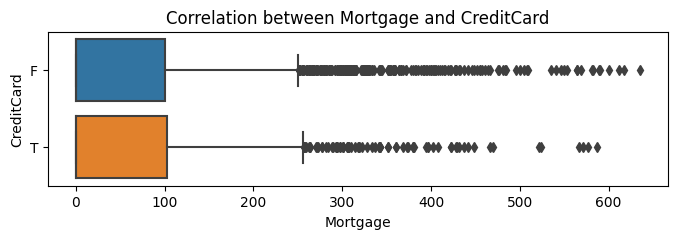

In [20]:
for num in num_df:
    for cat in cat_df:
        plt.figure(figsize=(8,2))
        sns.boxplot(x=num, y=cat, data=df)
        plt.title("Correlation between " + num + " and " + cat)
        plt.show()

After visualizing the relationship between each pair of explanatory variables the pairs with strong associations are age and education, CCAvg and CD_Account, Credit Card and CD_Account, Online and CD_Account, and CD_Account and Securities Account. 

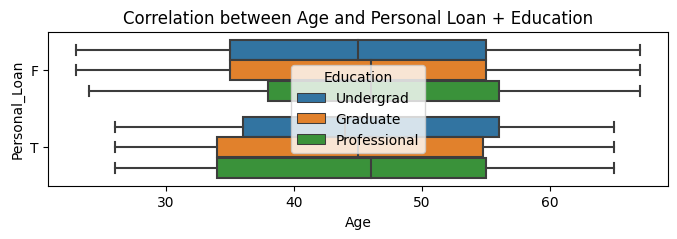

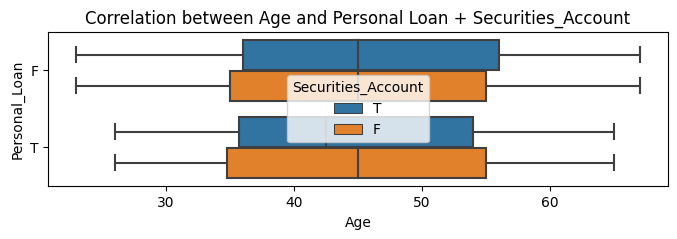

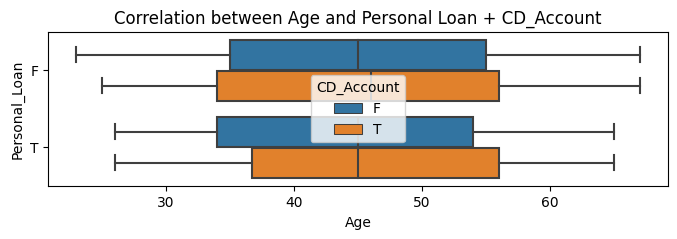

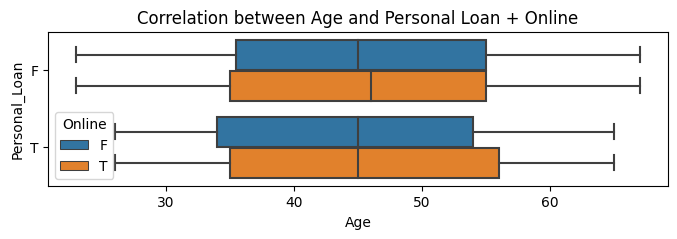

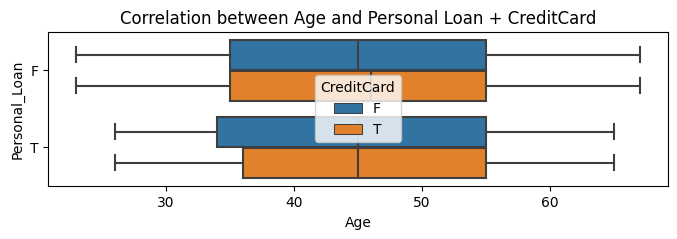

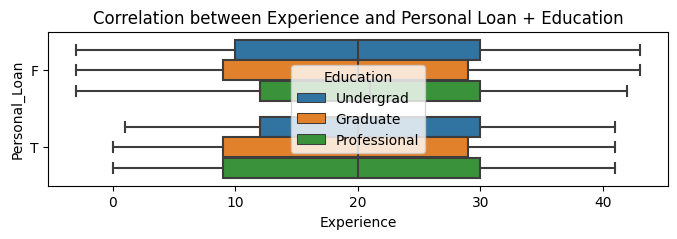

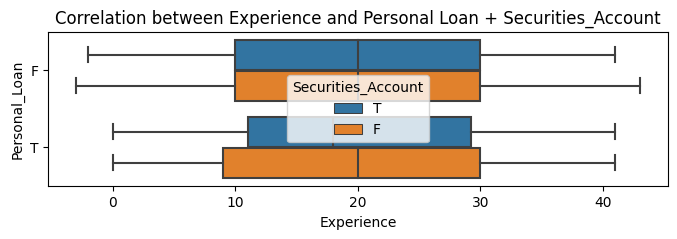

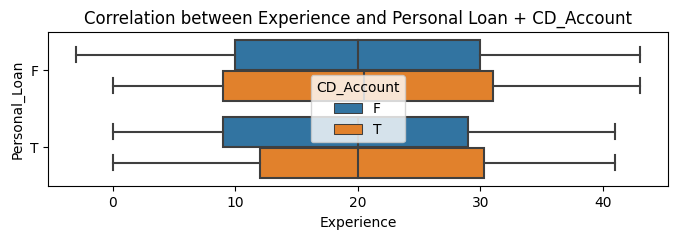

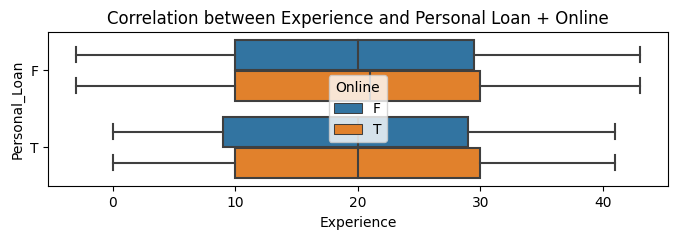

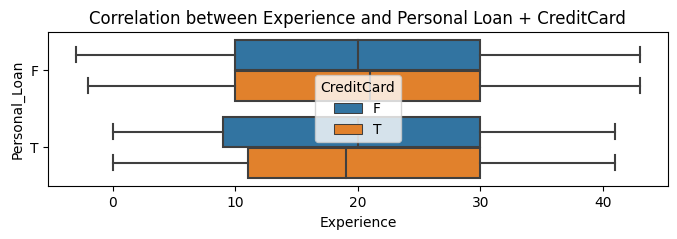

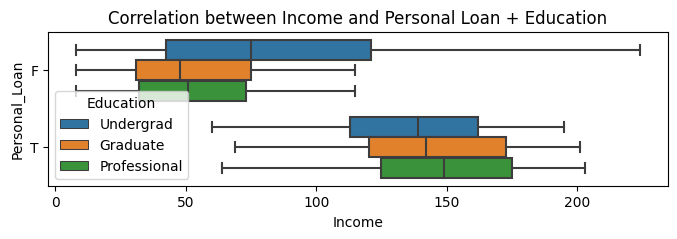

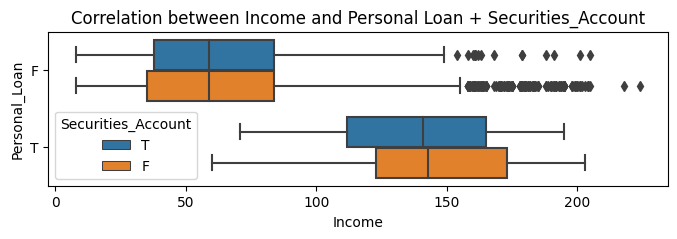

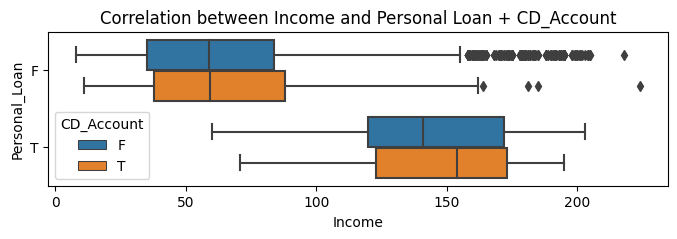

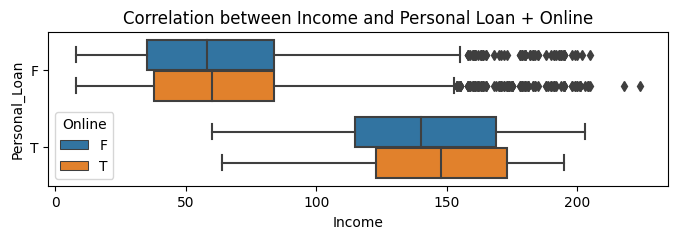

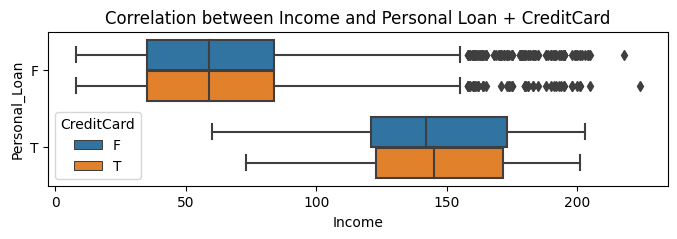

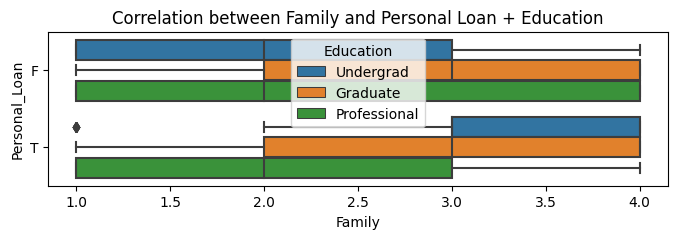

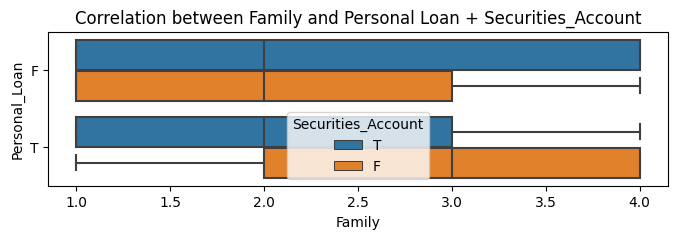

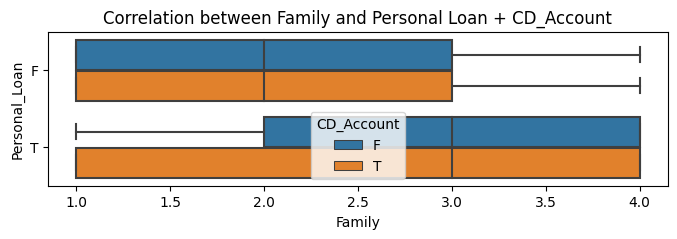

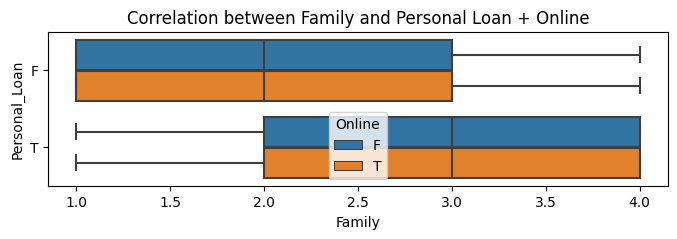

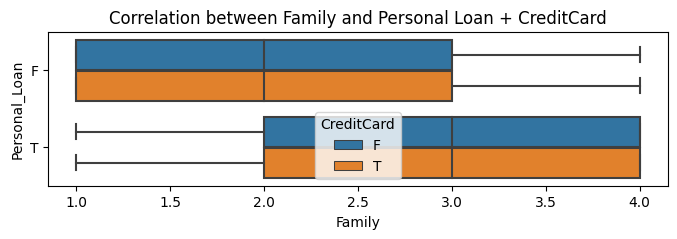

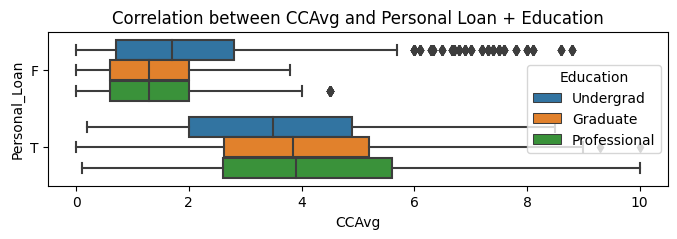

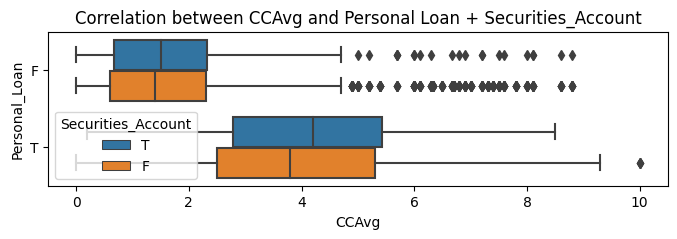

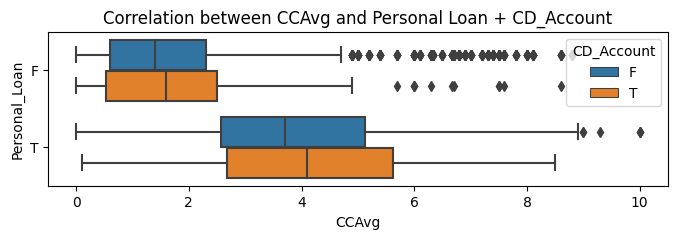

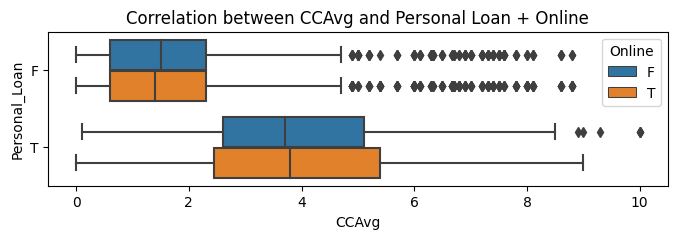

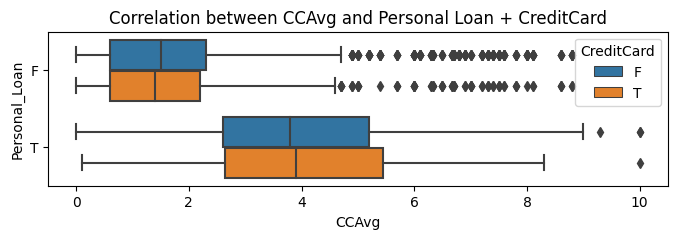

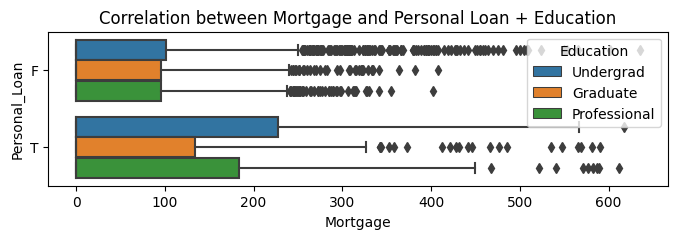

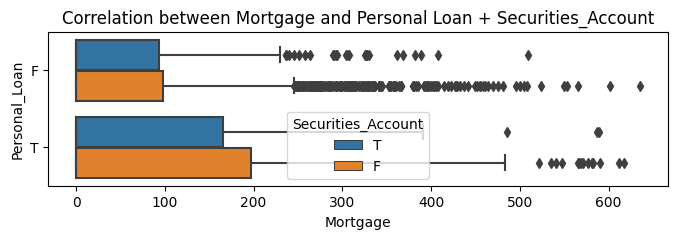

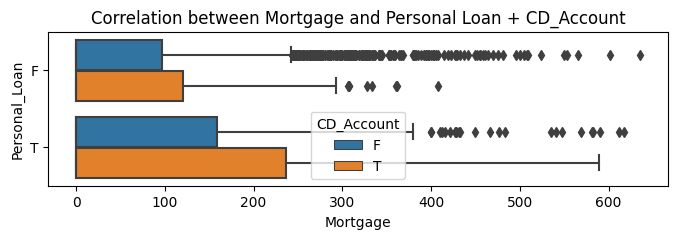

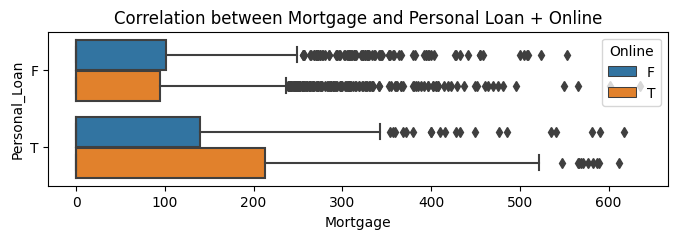

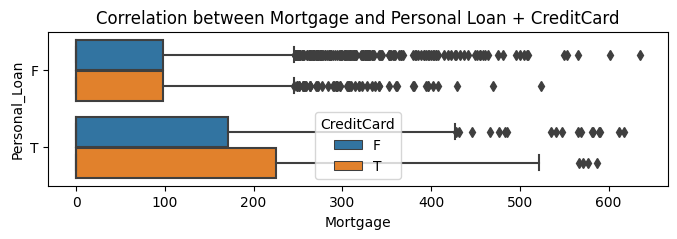

In [21]:
for num in num_df:
    for cat in cat_df:
        plt.figure(figsize=(8,2))
        sns.boxplot(x=num, y="Personal_Loan", hue=cat, data=df)
        plt.title("Correlation between " + num + " and Personal Loan + " + cat)
        plt.show()

After visualizing how all numerical and categorical explantory variable pairs' impact the predicted response variable, the pairs with an impact on the predicted response variable are Mortgage and CreditCard, Mortgage and Online, Mortgage and CD_Account, Mortgage and Education, Family and CreditCard, Family and Online, Family and CD_Account, and Income and Education. 

## 5. Model Data Preprocessing

1. Changing personal loan, the response variable, to a 0/1 response variable, 

In [22]:
df['Personal_Loan'] = df['Personal_Loan'].replace({'T':1, 'F':0})
df.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,25,1,49,4,1.6,Undergrad,0,0,T,F,F,F
1,45,19,34,3,1.5,Undergrad,0,0,T,F,F,F
2,39,15,11,1,1.0,Undergrad,0,0,F,F,F,F
3,35,9,100,1,2.7,Graduate,0,0,F,F,F,F
4,35,8,45,4,1.0,Graduate,0,0,F,F,F,T


2. Scaling all of the numerical explanatory variables.

In [23]:
scaler = StandardScaler()
scaled_num_df = scaler.fit_transform(num_df)
num_df_scaled = pd.DataFrame(scaled_num_df, columns=num_df.columns)
num_df_scaled.head()

,Age,Experience,Income,Family,CCAvg,Mortgage
0,-1.774417,-1.666078,-0.538229,1.397414,-0.193385,-0.555524
1,-0.029524,-0.096330,-0.864109,0.525991,-0.250611,-0.555524
2,-0.552992,-0.445163,-1.363793,-1.216855,-0.536736,-0.555524
3,-0.901970,-0.968413,0.569765,-1.216855,0.436091,-0.555524
4,-0.901970,-1.055621,-0.625130,1.397414,-0.536736,-0.555524


3. Translating all of the categorical variables into indicator variables. In addition, we are concating the scaled numerical explanatory variables with the indicator variables to create a features matrix.

In [24]:
c = pd.get_dummies(cat_df, drop_first=True, dtype=int)
feat = pd.concat([num_df_scaled, c], axis=1)
feat.head()

,Age,Experience,Income,Family,CCAvg,Mortgage,Education_Professional,Education_Undergrad,Securities_Account_T,CD_Account_T,Online_T,CreditCard_T
0,-1.774417,-1.666078,-0.538229,1.397414,-0.193385,-0.555524,0,1,1,0,0,0
1,-0.029524,-0.096330,-0.864109,0.525991,-0.250611,-0.555524,0,1,1,0,0,0
2,-0.552992,-0.445163,-1.363793,-1.216855,-0.536736,-0.555524,0,1,0,0,0,0
3,-0.901970,-0.968413,0.569765,-1.216855,0.436091,-0.555524,0,0,0,0,0,0
4,-0.901970,-1.055621,-0.625130,1.397414,-0.536736,-0.555524,0,0,0,0,0,1


4. Creating a target array.

In [25]:
arr = df["Personal_Loan"]
arr

0       0
1       0
2       0
3       0
4       0
       ..
4995    0
4996    0
4997    0
4998    0
4999    0
Name: Personal_Loan, Length: 5000, dtype: int64

## 6. Feature Selection with k-Fold Cross-Validation

Creating a cross validation for our kFold Cross-Validation

In [26]:
cross_val = KFold(n_splits=5, shuffle=True, random_state=207)

Creating an unregularized logistic regression model to compare with our regularized models.

In [27]:
log_mod = LogisticRegression()
test_fold=cross_val_score(log_mod, feat, arr, cv=cross_val, scoring="roc_auc")
test_fold.mean()

0.9602031995714881

The AUC score for our unregularized logistic model is 0.9602031995714881.

#### Regularization Models
Using regularization techniques (Lasso, Ridge, Elastic Net) to help find the best possible predictive model.
<br> Creating over 100 lambda models with unique lambdas and storing the average test AUC scores in a dataframe for these 3 regularization techniques.

In [28]:
#Finding the best Lasso model
warnings.filterwarnings('ignore')
data = []
for lamb in np.arange(0,0.00202,0.00002):
    d = {"lambda", "auc", "std"}
    lasso = Lasso(alpha=lamb, max_iter=1000)
    k = cross_val_score(lasso, feat, arr, cv=cross_val, scoring="roc_auc")
    auc = k.mean()
    std = k.std()
    d = {'lambda': lamb, 'auc': auc, "std": std}
    data.append(d)
results = pd.DataFrame(data)
results

,lambda,auc,std
0,0.00000,0.959538,0.009241
1,0.00002,0.959555,0.009253
2,0.00004,0.959548,0.009260
3,0.00006,0.959556,0.009253
4,0.00008,0.959549,0.009253
...,...,...,...
96,0.00192,0.959667,0.009409
97,0.00194,0.959658,0.009419
98,0.00196,0.959651,0.009438
99,0.00198,0.959642,0.009433


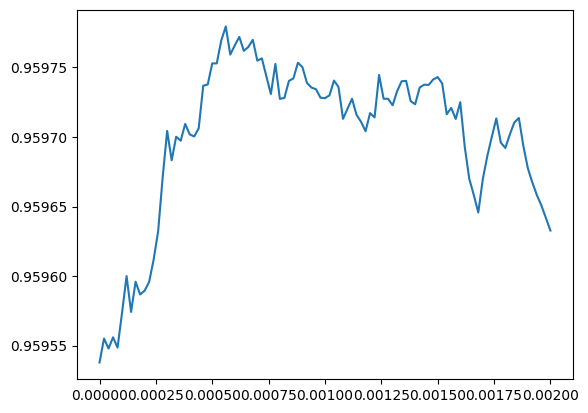

In [29]:
plt.plot(results['lambda'].values, results['auc'].values)
plt.show()

In [30]:
results.nlargest(1, "auc")

,lambda,auc,std
28,0.00056,0.959779,0.009143


The best regularized model for Lasso has a mean test auc score of 0.959779 with a lambda value of 0.0056.

In [31]:
#Finding the best Ridge model
ridge_data = []
for lamb in np.arange(0,301,1):
    ridge_d = {"lambda", "auc", "std"}
    ridge = Ridge(alpha=lamb, max_iter=1000)
    ridgek = cross_val_score(ridge, feat, arr, cv=cross_val, scoring="roc_auc")
    ridge_auc = ridgek.mean()
    ridge_std = ridgek.std()
    ridge_d = {'lambda': lamb, 'auc': ridge_auc, 'std' : ridge_std}
    ridge_data.append(ridge_d)
ridge_results = pd.DataFrame(ridge_data)
ridge_results

,lambda,auc,std
0,0,0.959538,0.009241
1,1,0.959615,0.009244
2,2,0.959659,0.009258
3,3,0.959664,0.009283
4,4,0.959717,0.009296
...,...,...,...
296,296,0.958866,0.011063
297,297,0.958838,0.011083
298,298,0.958826,0.011084
299,299,0.958823,0.011090


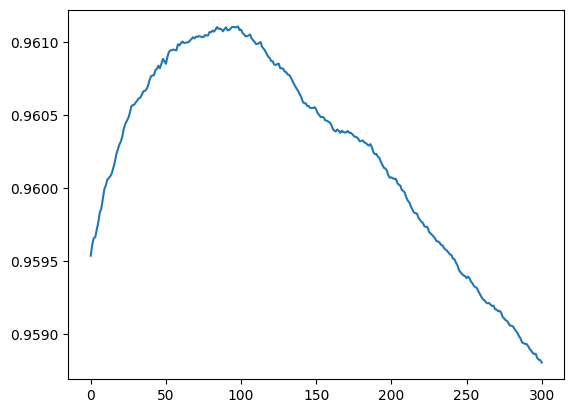

In [32]:
plt.plot(ridge_results['lambda'].values, ridge_results['auc'].values)
plt.show()

In [33]:
ridge_results.nlargest(1, 'auc')

,lambda,auc,std
98,98,0.961108,0.010229


The best regularized model for Ridge regression has a mean test auc score of 0.961108 with a lambda value of 98.

In [34]:
#Finding the best Elastic Net model
enet_data = []
for lamb in np.arange(0,0.05,0.0005):
    enet_d = {"lambda", "auc", "std"}
    enet = ElasticNet(alpha=lamb, max_iter=10000)
    enetk = cross_val_score(enet, feat, arr, cv=cross_val, scoring="roc_auc")
    enet_auc = enetk.mean()
    enet_std = enetk.std()
    enet_d = {'lambda': lamb, 'auc': enet_auc, 'std' : enet_std}
    enet_data.append(enet_d)
enet_results = pd.DataFrame(enet_data)
enet_results

,lambda,auc,std
0,0.0000,0.959538,0.009241
1,0.0005,0.959663,0.009235
2,0.0010,0.959804,0.009167
3,0.0015,0.959852,0.009238
4,0.0020,0.959849,0.009302
...,...,...,...
95,0.0475,0.940899,0.012299
96,0.0480,0.940544,0.012230
97,0.0485,0.940244,0.012139
98,0.0490,0.939873,0.012061


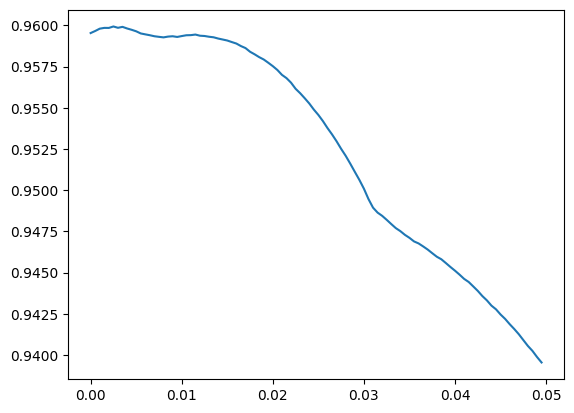

In [35]:
plt.plot(enet_results['lambda'].values, enet_results['auc'].values)
plt.show()

In [36]:
enet_results.nlargest(1, 'auc')

,lambda,auc,std
5,0.0025,0.959937,0.00931


The best regularized model for Elastic Net has a mean test auc score of 0.959937 with a lambda value of 0.0025.

## 7. Best Model Discussion

#### Best Model
Because Lasso, Ridge, and Elastic Net Regularization all found a similar highest ROC AUC scores of ~0.96, they would all be considered "best" models. However, our experimental best model suggests the Ridge Regression model with lambda=98 with an AUC score of 0.961108 to be the best fit which is only ~0.002 AUC score better than the best Lasso and Net Elastic models.

1. Creating a dataframe with the scaled explanatory variables. Performing a train-test split with the dataframe.

In [37]:
df1 = feat
df1["Personal_Loan"] = arr
dftr, dfte = train_test_split(df1, test_size=0.2, random_state=207)
dfte.shape[0]/df1.shape[0]

0.2

2. Creating a features matrix and target array from the training dataset.

In [38]:
xtr = dftr.drop(["Personal_Loan"], axis=1)
xtr.head(1)

,Age,Experience,Income,Family,CCAvg,Mortgage,Education_Professional,Education_Undergrad,Securities_Account_T,CD_Account_T,Online_T,CreditCard_T
3254,1.366391,1.473418,-1.407244,-0.345432,-0.937312,-0.555524,1,0,0,0,1,0


In [39]:
xte = dfte.drop(["Personal_Loan"], axis=1)
xte.head(1)

,Age,Experience,Income,Family,CCAvg,Mortgage,Education_Professional,Education_Undergrad,Securities_Account_T,CD_Account_T,Online_T,CreditCard_T
3966,-1.07646,-1.142829,0.222159,-1.216855,0.550541,-0.555524,1,0,0,0,1,0


In [40]:
ytr = dftr["Personal_Loan"]
ytr.head()

3254    0
4154    1
2784    1
4043    0
2743    0
Name: Personal_Loan, dtype: int64

3. Fitting the best models found previously with the training features matrix and the target array.

In [41]:
ridge_model = Ridge(alpha = 98, max_iter = 1000)
ridge_model.fit(xtr,ytr)

Ridge(alpha=98, max_iter=1000)

In [42]:
lasso_model = Lasso(alpha = 0.00056, max_iter = 1000)
lasso_model.fit(xtr,ytr)

Lasso(alpha=0.00056)

In [43]:
elastic_net_model = ElasticNet(alpha=0.0025, max_iter=10000)
elastic_net_model.fit(xtr,ytr)

ElasticNet(alpha=0.0025, max_iter=10000)

4. Displaying the slopes for each of our best models.

In [44]:
ridge_slopes = pd.DataFrame({'ridge_model': ridge_model.coef_.T,
                             'lasso_model': lasso_model.coef_.T,
                            'elastic_net_model': elastic_net_model.coef_.T}, index=xtr.columns)
print(ridge_model.intercept_)
ridge_slopes

0.14634909471990393


,ridge_model,lasso_model,elastic_net_model
Age,-0.006950,0.000000,0.000000
Experience,0.010962,0.003806,0.003006
Income,0.138090,0.140950,0.140863
Family,0.034188,0.033317,0.032656
CCAvg,0.019506,0.014969,0.014942
Mortgage,0.010410,0.007506,0.007618
Education_Professional,0.010659,0.000000,0.000000
Education_Undergrad,-0.120579,-0.134398,-0.131403
Securities_Account_T,-0.018795,-0.042537,-0.027520
CD_Account_T,0.215400,0.319216,0.289058


#### Best Model Equation (Ridge)
Predicted Personal Loan = 0.14759392633933477

-0.006950 x Age

+0.010962 x Experience

+0.138090 x Income

+0.034188 x Family

+0.019506 x CCAvg

+0.010410 x Mortgage

+0.010659 x Education_Professional

-0.120579 x Education_Undergrad

-0.018795 x Securities_Account_T

+0.215400 x CD_Account_T

-0.015059 x Online_T

-0.019970 x CreditCard_T

#### Multicollinearity
Out of the remaining explanatory variables in this model, this model has an issue with multicollinearity as age and experience are strongly correlated. Age and Experience have a correlation of 0.994328 which is well above the threshold of 0.7.

In [45]:
xtr.corr()

,Age,Experience,Income,Family,CCAvg,Mortgage,Education_Professional,Education_Undergrad,Securities_Account_T,CD_Account_T,Online_T,CreditCard_T
Age,1.000000,0.994328,-0.053253,-0.057809,-0.040141,0.001791,0.038719,-0.007267,0.002445,0.007011,0.020253,0.008999
Experience,0.994328,1.000000,-0.044111,-0.064873,-0.037200,0.003176,0.013706,0.016856,0.003413,0.009113,0.020721,0.009399
Income,-0.053253,-0.044111,1.000000,-0.154464,0.641483,0.205688,-0.110391,0.218841,-0.002724,0.177546,0.008885,0.004885
Family,-0.057809,-0.064873,-0.154464,1.000000,-0.111963,-0.018463,-0.003522,-0.120385,0.022444,0.014686,0.012051,0.003987
CCAvg,-0.040141,-0.037200,0.641483,-0.111963,1.000000,0.121328,-0.086603,0.161774,0.018855,0.145947,-0.009636,0.000991
Mortgage,0.001791,0.003176,0.205688,-0.018463,0.121328,1.000000,0.002111,0.022395,-0.014589,0.104200,-0.008845,0.003381
Education_Professional,0.038719,0.013706,-0.110391,-0.003522,-0.086603,0.002111,1.000000,-0.559762,-0.017579,0.010106,-0.018604,0.005959
Education_Undergrad,-0.007267,0.016856,0.218841,-0.120385,0.161774,0.022395,-0.559762,1.000000,0.012706,-0.013017,0.000109,0.013645
Securities_Account_T,0.002445,0.003413,-0.002724,0.022444,0.018855,-0.014589,-0.017579,0.012706,1.000000,0.305555,0.006258,-0.013652
CD_Account_T,0.007011,0.009113,0.177546,0.014686,0.145947,0.104200,0.010106,-0.013017,0.305555,1.000000,0.172248,0.283276


#### Slope Interpretations
Although the model has a multicollinear pair between Age and Experience, their slope magnitudes are so small when predicting the response variable. Therefore, we can mostly trust the magnitudes of the slopes as indicating how important the corresponding explanatory variables are. Thus in order of greatest to least predictive power: 1) CD_Account 2) Income 3) Education (Undergrad) 4) Family 5) CreditCard_T 6) Securities_Acounnt_T 7) CCAvg 8) Online_T 9) Experience 10) Mortgage 11) Education Professional 12) Age. This order makes sense as both Education Professional and Age are zeroed out in the Lasso and Elastic Net model.


#### Overfitting Explanatory Variables

The best model does suggest that age and education_professional are explanatory variables that indicate overfitting. This is because in fitting our Lasso and Elastic Net Regularization, these two variables zeroed out suggesting that they do not bring enough predictive power to the model for increasing AUC score. In the side by side boxplots in our preliminary analysis for Age and Personal Loan Acceptance, there is almost no association between these two variables as the boxplots heavily overlap. However, for Education, Education (Undergraduate) has a different distribution frequency compared to (Professional) or (Graduate). Thus, only Age has a weak assocations with our response variables. The overfitting explanatory variables were not strongly associated with any other explanatory variables.

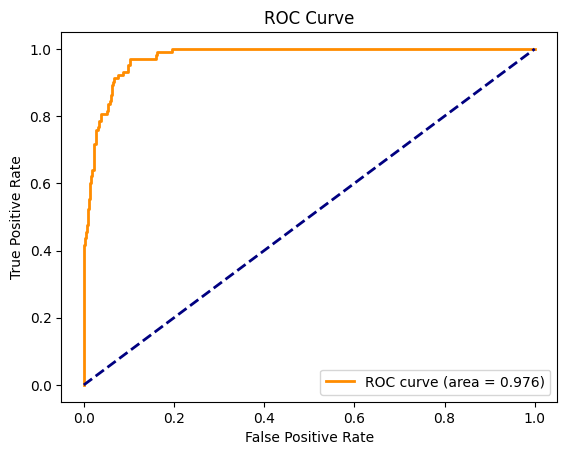

In [46]:
dfte["predictive prob"] = ridge_model.predict(xte)
fprs, tprs, thresholds = roc_curve(y_true=dfte["Personal_Loan"], y_score=dfte["predictive prob"])
prdf = pd.DataFrame({'fpr' : fprs, 'tpr' : tprs})
auc = roc_auc_score(y_true=dfte["Personal_Loan"], y_score=dfte["predictive prob"])
def plot_roc(fpr, tpr, auc, lw=2):
    plt.plot(fpr, tpr, color='darkorange', lw=lw,
             label='ROC curve (area = '+str(round(auc,3))+')')
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc="lower right")
    plt.show()
plot_roc(fprs, tprs, auc)

#### Test ROC and AUC
The AUC score for this classifier model is 0.976 which is really close to a perfect 1.00 AUC score. This model's high AUC score suggests that the best logisitc predictive model would provide highly accurate classifications of datasets considering all possible predictive probability thresholds. The ROC curve AUC is also way past the worst case scenario line, meaning the full logistic regression model would perform extremely well in classifying test datasets. In summary, this logistic model would be really good at identifying new customers who would accept loans and those who would not accept loans because the distance from the furthest top left point to the ideal ROC curve point where TPR = 1 and FPR = 0 is extremely short. Thus with a high AUC, this full model would create an ideal classifications scenario in new datasets.

In [47]:
def fpr_tpr_thresh(y, predictive_prob, thresh):
    yhat = 1*(predictive_prob >= thresh)
    tn, fp, fn, tp = confusion_matrix(y_true=y, y_pred=yhat).ravel()
    tpr = tp/ (fn+tp)
    fpr = fp/ (fp+tn)
    return pd.DataFrame({'threshold':[thresh], 'fpr':[fpr], 'tpr':[tpr]})

In [48]:
for thresh in np.arange(0,1.01,0.01):
    print(fpr_tpr_thresh(dfte["Personal_Loan"],dfte["predictive prob"], thresh))

   threshold       fpr  tpr
0        0.0  0.662207  1.0
   threshold       fpr  tpr
0       0.01  0.629877  1.0
   threshold       fpr  tpr
0       0.02  0.606466  1.0
   threshold       fpr  tpr
0       0.03  0.566332  1.0
   threshold       fpr  tpr
0       0.04  0.536232  1.0
   threshold       fpr  tpr
0       0.05  0.508361  1.0
   threshold       fpr  tpr
0       0.06  0.476031  1.0
   threshold       fpr  tpr
0       0.07  0.447046  1.0
   threshold       fpr  tpr
0       0.08  0.425864  1.0
   threshold       fpr  tpr
0       0.09  0.401338  1.0
   threshold       fpr  tpr
0        0.1  0.366778  1.0
   threshold       fpr  tpr
0       0.11  0.338907  1.0
   threshold       fpr  tpr
0       0.12  0.313266  1.0
   threshold       fpr  tpr
0       0.13  0.285396  1.0
   threshold       fpr  tpr
0       0.14  0.264214  1.0
   threshold       fpr  tpr
0       0.15  0.238573  1.0
   threshold       fpr  tpr
0       0.16  0.219621  1.0
   threshold       fpr  tpr
0       0.17  0.1950

#### Best Predictive Probability Threshold
To meet our primary research goal in identifying customers who are predicted to take loans and actually took loans (true positive rate: tpr), we should use a probability threshold of 0.17, as it maxed the classifier's true positive rate of 1.0 and minimized the false positive rate to 0.195095. A low false positive rate suggests that the model predicted a lot of customers who took loans but actually didn't in low quantity. This is beneficial as bankers and financial advisors can better identfy customers who are likely to accept loans without having to spend time with all their customers. 

## 8. Additional Analysis/Insight

For addiitional analysist, we decided to look into income's predictive probability for predicting whether or not someone will accepet a personal loan. We decided to use income as it as been shown to have a very strong correlation with someone accepting a personal loan. For the analysis we first created a box plot to show its effect on whether or not someone will accept a personal loan.

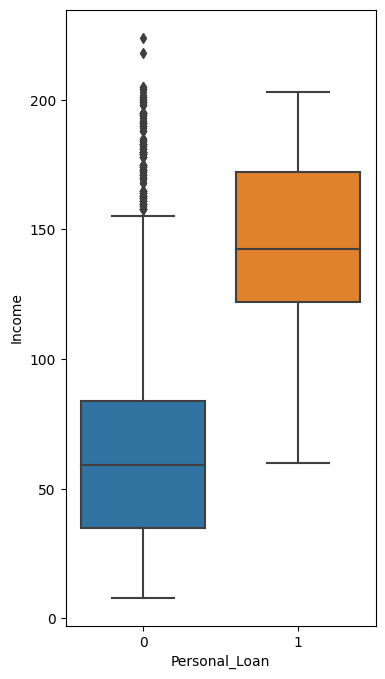

In [70]:
plt.figure(figsize=(4,8))
sns.boxplot(y='Income', x='Personal_Loan', data=df)
plt.show()

Created a train and test dataset with just income. Then created a logistic model and predicted the probability.

Optimization terminated successfully.
         Current function value: 0.201932
         Iterations 8


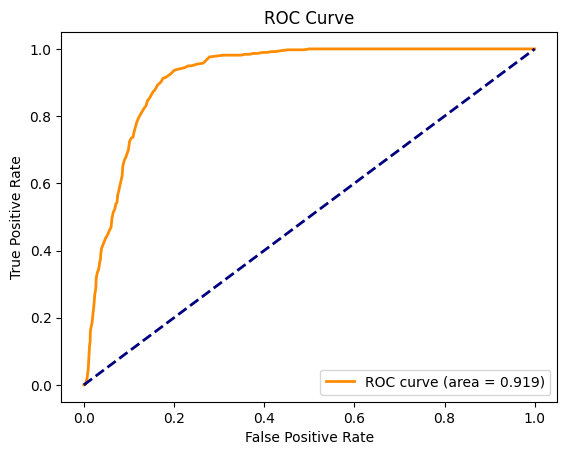

In [71]:
dftr_Income_and_Personal_Loan = dftr[["Personal_Loan", "Income"]]
dftr_Income = dftr[["Income"]]
dfte_Income_and_Personal_Loan = dftr[["Personal_Loan", "Income"]]
dfte_Income = dftr[["Income"]]
new_model = smf.logit(formula='Personal_Loan~Income', data=dftr_Income_and_Personal_Loan).fit()
dfte_Income_and_Personal_Loan['predictive_prob'] = new_model.predict(dfte_Income)
fprs, tprs, thresholds = roc_curve(y_true=dfte_Income_and_Personal_Loan['Personal_Loan'], 
                            y_score=dfte_Income_and_Personal_Loan['predictive_prob'])
auc = roc_auc_score(y_true=dfte_Income_and_Personal_Loan['Personal_Loan'], 
                            y_score=dfte_Income_and_Personal_Loan['predictive_prob'])
plot_roc(fprs, tprs, auc)

The AUC score ended up being extremely high at a score of 0.919. This suggests that if we were to just use income to predict whether or not someone would accept a personal loan, this model would be able to do so pretty well. This AUC plot indicates that income was an extremely strong predictor when creating our regularized models.

## 9. Conclusion

#### Recommendation
I would recommend my best model of ridge regression to be used by bankers and financial advisors as the model yielded a mean ROC test AUC score of 0.961108 with a lambda value of 98 which is super close to a value of 1.00. In predicting the test dataset, the model also recorded an AUC score of 0.976. These high ROC AUC scores indicate that our best model is extremely efficient at distinguishing between positives and negatives for customers in whether they accepted or didn’t accept personal loans from the bank.


#### Shortcomings/Caveats
While this ROC AUC score is certainly very high, there is always room for improvement in finding the "best" classifier model, such as including the other financial conditions which could pinpoint personal loan decisions even more accurately given the dataset had more data points. A more deep analysis would have also disregarded many of our 12 explanatory variables that were confidential to customers (CCAvg, Mortgage, Income, etc.) to see how our model would have performed with less information. A more complete analysis would have removed Age as an explanatory variable from the start due to how little association it had with the response variable. This variable inclusion is a reason why our final model had an issue with multicollinearity which could thus lead to overfitting of our model. These are all shortcomings to building the best possible model; however, given our high ROC AUC score confirmed by multiple models, it is safe to utilize this information/model in predicting future datasets.

#### Future Work
The model in this report included explanatory variables that did not have much predictive strength. In the future, by considering other financial indicators (cash flow statement, student loans, unpaid taxes, etc.), the predictive model could potentially improve its accuracy and offer a greater understanding on the factors influencing loan acceptance. In addition, adding more of these financial/banking explanatory variables could also provide bankers and financial advisors a more comprehensive insight on customer behavior in taking personal loans. The response variable of accepting student loans can also be swapped around with the explanatory variables to create new research goals.

## References

[1] Bareham, H., “What is a personal loan?,” Bankrate, Available: https://www.bankrate.com/loans/personal-loans/what-is-a-personal-loan/. (accessed 23 November, 2023).
<br> [2] Walke, K., “Bank_Personal_Loan_Modelling,” Kaggle, Available: https://www.kaggle.com/datasets/krantiswalke/bank-personal-loan-modelling. (accessed 23 November, 2023).